In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
car_data = pd.read_csv(r"C:\Users\Siddhesh\Desktop\car data1.csv") 
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,NaN,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,0.00,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,NaN,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,0.00,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    5
Present_Price    6
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan,strategy='mean')
car_data[['Selling_Price','Present_Price']]=si.fit_transform(car_data[['Selling_Price','Present_Price']])

In [6]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)  
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)  
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True) 

In [9]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [26]:
colname= car_data.select_dtypes(['int64','float']).columns

In [27]:
from scipy.stats import skew

In [28]:
skew(car_data['Year'])

-1.2399702494847509

Year
-1.2399702494847509


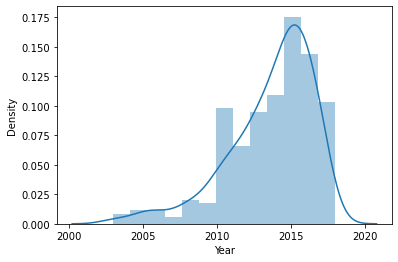

Selling_Price
2.5036810157431324


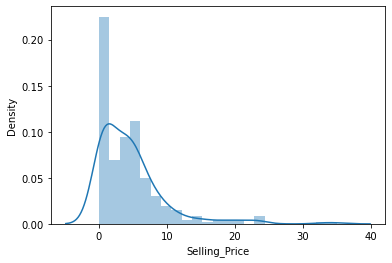

Present_Price
4.094866992041076


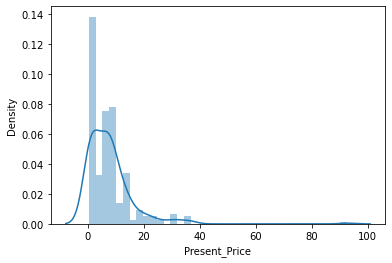

Kms_Driven
6.403895025283172


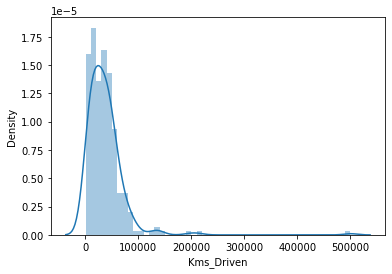

Fuel_Type
1.661269600021726


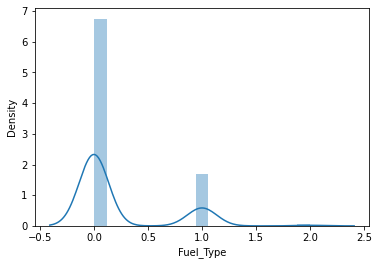

Seller_Type
0.6190415051506463


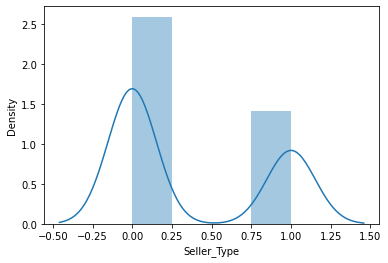

Transmission
2.1629278085458243


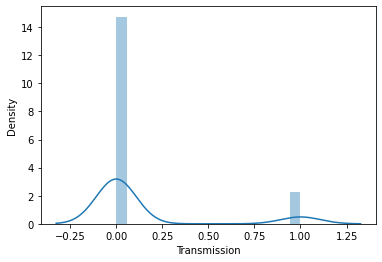

Owner
7.578839290299513


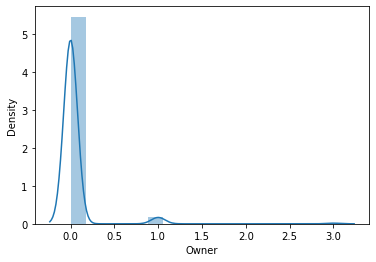

In [29]:
for i in car_data[colname]:
    print(i)
    print(skew(car_data[i]))
    
    plt.figure()
    sns.distplot(car_data[i])
    plt.show()

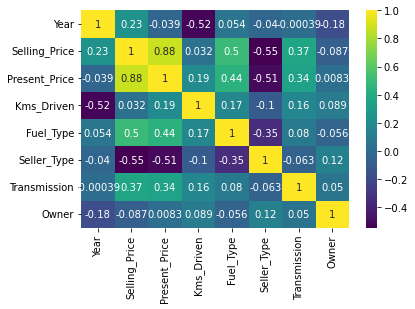

In [10]:
corrMatrix = car_data.corr() 
sns.heatmap(corrMatrix, annot=True, cmap="viridis") 
plt.show() 

In [11]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn import metrics 

In [12]:
X = car_data.drop(['Car_Name','Selling_Price'],axis=1)  
Y = car_data['Selling_Price']  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42) 

In [13]:
linreg = LinearRegression()
linreg.fit(X_train,Y_train)
Y_pred = linreg.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [15]:
mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test,Y_pred)

In [16]:
print('MAE: ',mae)
print('MSE: ',mse)
print('RMSE: ',rmse)
print('Accuracy: ',r2)

MAE:  1.273203211002449
MSE:  3.8386001962140073
RMSE:  1.9592345944817346
Accuracy:  0.8333621535484422


In [17]:
train = linreg.score(X_train,Y_train)
test = linreg.score(X_test,Y_test)

print("Training performance :",train)
print("Testing performance: ",test)

Training performance : 0.8790645050167895
Testing performance:  0.8333621535484422


<AxesSubplot:xlabel='Selling_Price'>

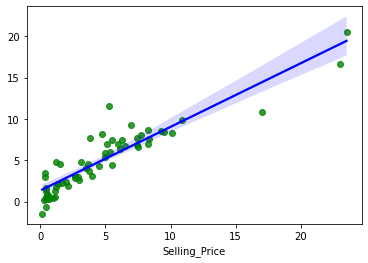

In [18]:
sns.regplot(Y_test, Y_pred, scatter_kws={"color": "green"}, 
            line_kws={"color": "blue"}) 